In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Estadistica

In [4]:
df = pd.read_csv('./declaraciones_sample.csv')

In [5]:
df.head()

,total_bienes_final,total_bienes_inicio
0,1199800.21,1006935.79
1,505177.06,434454.75
2,2862043.30,2275473.29
3,2225806.97,1600085.00
4,261076.55,256931.00


In [6]:
# Estadistica basica
df.describe()

,total_bienes_final,total_bienes_inicio
count,1.000000e+04,1.000000e+04
mean,1.396782e+06,9.998973e+05
std,4.642415e+06,3.258374e+06
min,0.000000e+00,0.000000e+00
25%,3.266429e+05,2.553542e+05
50%,7.112650e+05,5.077120e+05
75%,1.485695e+06,1.080271e+06
max,2.254897e+08,1.507560e+08


## Para mas detalle podemos graficar un histograma

### Que es un histograma?
Ejercicio en conjunto en clase

In [7]:
alturas = [1.7, 1.7, 1.75, 1.8, 1.6, 1.6, 1.8, 1.75, 1.6, 1.7 , 1.65, 1.6, 1.7, 1.65, 1.7 , 1.7 , 1.7, 1.5, 1.5]

(array([2., 0., 0., 4., 0., 2., 7., 0., 2., 2.]),
 array([1.5 , 1.53, 1.56, 1.59, 1.62, 1.65, 1.68, 1.71, 1.74, 1.77, 1.8 ]),
 <a list of 10 Patch objects>)

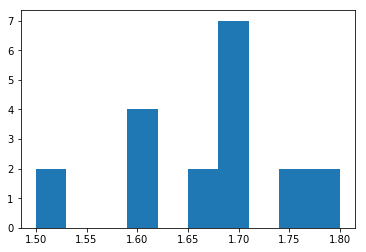

In [8]:
plt.hist(alturas)

(array([2., 0., 6., 7., 2., 2., 0.]),
 array([1.5 , 1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85]),
 <a list of 7 Patch objects>)

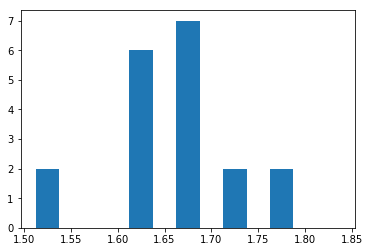

In [9]:
plt.hist(alturas, bins=np.arange(1.5, 1.85, 0.05), rwidth=0.5)

In [10]:
np.arange(1.5, 1.85, 0.5)

array([1.5])

## Volviendo al dataset

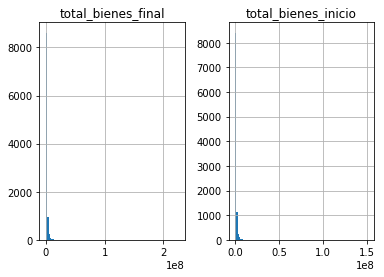

In [11]:
df.hist(bins=100);

Por que no se ve nada en este grafico?

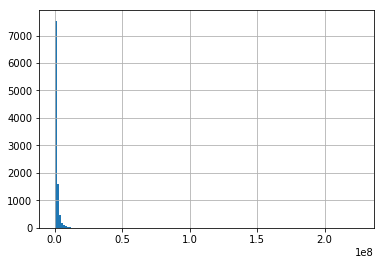

In [12]:
df.total_bienes_final.hist(bins=150);


Es una distribucion con colas largas

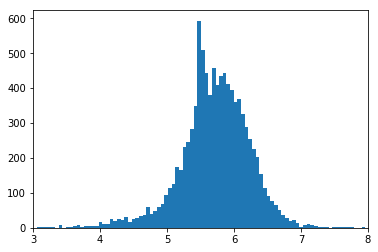

In [13]:
log_inicio = np.log10(df.total_bienes_inicio + 1)
log_final = np.log10(df.total_bienes_final + 1)
plt.hist(log_inicio, bins=150)
plt.xlim(3, 8);

¿Que cosas llaman la atencion de este grafico?

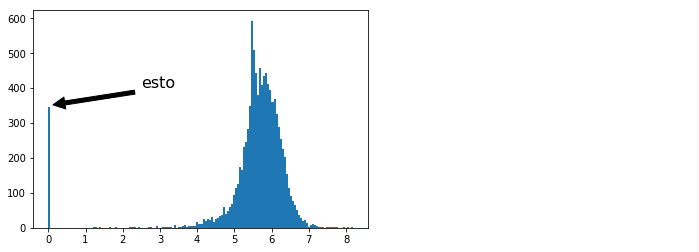

In [14]:
plt.hist(log_inicio, bins=150);
plt.annotate('esto', xy=(0, 350), xytext=(2.5, 400),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=16
            )

plt.annotate('y esto', xy=(12.5, 600), xytext=(16, 500),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=16
            );


## Ej

Prueben que filtrando los valores cero desaparece el pico de la izquierda

In [15]:
# Ej 



¿y el otro? Miremos con mas detalle

(7.5, 17.5)

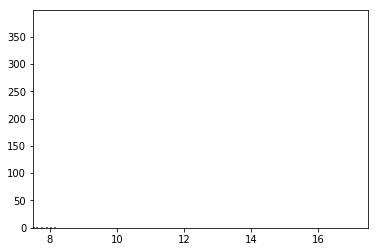

In [16]:
plt.hist(log_inicio, bins=250);
plt.xlim(7.5, 17.5)


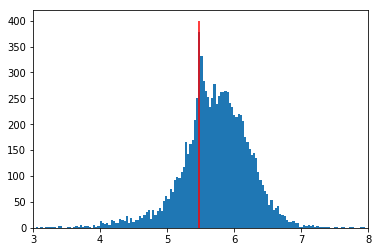

In [17]:
# Agregemos el limite de bienes personales
plt.hist(log_inicio, bins=250);
plt.xlim(3, 8)
plt.vlines(np.log10(300000), 0, 400, 'r')

In [18]:
df.total_bienes_inicio.mean()

999897.3431200061

¿Es representativo el promedio?

In [19]:
np.mean(df.total_bienes_inicio > df.total_bienes_inicio.mean())

0.2732

In [20]:
df.total_bienes_inicio > df.total_bienes_inicio.mean()

0        True
1       False
2        True
3        True
4       False
5       False
6        True
7        True
8       False
9        True
10      False
11      False
12      False
13       True
14       True
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22       True
23      False
24      False
25      False
26      False
27       True
28      False
29      False
        ...  
9970    False
9971     True
9972     True
9973    False
9974    False
9975    False
9976    False
9977     True
9978    False
9979     True
9980    False
9981    False
9982    False
9983    False
9984    False
9985     True
9986    False
9987    False
9988     True
9989    False
9990     True
9991     True
9992    False
9993    False
9994     True
9995     True
9996     True
9997    False
9998    False
9999    False
Name: total_bienes_inicio, Length: 10000, dtype: bool

¿Como se comparan los valores al inicio y al final?

(3, 8)

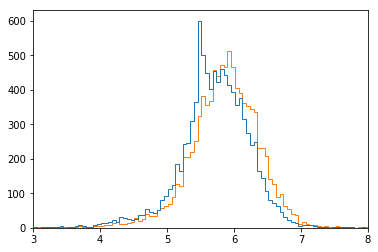

In [21]:
plt.hist([log_inicio, log_final], bins=150, histtype='step');
plt.xlim(3,8)

# Otro dataset

In [22]:
df = pd.read_csv('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/VELOC-PROME-DE-BAJAD-DE/data.csv?auth_key=44a38fbffd39c9f7d84e8e7dd2e1d02f0950e611&download=1',
                decimal=',')

In [23]:
df.head() # Mbps esta con coma! 

,Año,Trimestre,Provincia,Mbps promedio de bajada
0,2019,2,Buenos Aires,22.48
1,2019,2,Capital Federal,30.35
2,2019,2,Catamarca,8.81
3,2019,2,Chaco,16.01
4,2019,2,Chubut,6.05


In [26]:
df.head()

,Año,Trimestre,Provincia,Mbps promedio de bajada
0,2019,2,Buenos Aires,22.48
1,2019,2,Capital Federal,30.35
2,2019,2,Catamarca,8.81
3,2019,2,Chaco,16.01
4,2019,2,Chubut,6.05


## Agrupamos por dos cosas a la vez (queda un Multiindex)

In [27]:
prom = df.groupby(['Año', 'Provincia'])['Mbps promedio de bajada'].mean()

In [28]:
prom

Año   Provincia          
2014  Buenos Aires            3.9375
      Capital Federal         4.3725
      Catamarca               2.9950
      Chaco                   3.5300
      Chubut                  3.1700
      Corrientes              3.4525
      Córdoba                 3.6750
      Entre Ríos              3.4200
      Formosa                 2.7250
      Jujuy                   2.8800
      La Pampa                2.7250
      La Rioja                3.1850
      Mendoza                 3.5000
      Misiones                3.6375
      Neuquén                 3.7000
      Río Negro               3.4500
      Salta                   3.4900
      San Juan                3.4725
      San Luis                3.5000
      Santa Cruz              3.3200
      Santa Fe                3.4050
      Santiago Del Estero     3.1450
      Tierra Del Fuego        3.4650
      Tucumán                 3.4425
2015  Buenos Aires            4.5900
      Capital Federal         5.4750
      Catama

In [29]:
# Seleccionar una anio

prom[(2014,'Chaco')]

3.53

In [30]:
# Elegir una provincia
prom[(slice(None), 'Chaco')]

Año
2014     3.5300
2015     5.3475
2016     6.5225
2017     8.7950
2018    12.8300
2019    14.7250
Name: Mbps promedio de bajada, dtype: float64

In [31]:
# El peor internet por anio

prom.groupby(level=0).idxmax()

Año
2014    (2014, Capital Federal)
2015    (2015, Capital Federal)
2016    (2016, Capital Federal)
2017    (2017, Capital Federal)
2018    (2018, Capital Federal)
2019    (2019, Capital Federal)
Name: Mbps promedio de bajada, dtype: object

In [32]:

extremos = pd.concat([prom.groupby(level=0).idxmin().str[1], 
                  prom.groupby(level=0).min(),
                  prom.groupby(level=0).idxmax().str[1],
                  prom.groupby(level=0).max()
                 ], axis=1)
extremos.columns = ['Provincia Min', 'Valor Min', 'Provincia Max', 'Valor Max']    
extremos

,Provincia Min,Valor Min,Provincia Max,Valor Max
Año,,,,
2014,Formosa,2.7250,Capital Federal,4.3725
2015,La Pampa,2.8850,Capital Federal,5.4750
2016,La Pampa,3.1325,Capital Federal,6.9925
2017,La Pampa,3.4900,Capital Federal,10.7575
2018,La Pampa,4.1750,Capital Federal,20.3175
2019,La Pampa,5.2750,Capital Federal,27.5350


In [33]:
pd.concat([prom.groupby(level=0).idxmin().str[1], prom.groupby(level=0).min()],axis=1)

,Mbps promedio de bajada,Mbps promedio de bajada
Año,,
2014,Formosa,2.7250
2015,La Pampa,2.8850
2016,La Pampa,3.1325
2017,La Pampa,3.4900
2018,La Pampa,4.1750
2019,La Pampa,5.2750


In [34]:
prom.groupby(level=1).mean()

Provincia
Buenos Aires            9.953750
Capital Federal        12.575000
Catamarca               5.571250
Chaco                   8.625000
Chubut                  4.238333
Corrientes              7.717500
Córdoba                 9.055000
Entre Ríos              7.075417
Formosa                 6.562500
Jujuy                   5.514583
La Pampa                3.613750
La Rioja                5.235000
Mendoza                 4.379167
Misiones                8.333333
Neuquén                 8.557083
Río Negro               6.288333
Salta                   6.685000
San Juan                4.379583
San Luis                6.034583
Santa Cruz              4.238333
Santa Fe                7.870833
Santiago Del Estero     4.939583
Tierra Del Fuego        4.491667
Tucumán                 8.560417
Name: Mbps promedio de bajada, dtype: float64

In [35]:
prom.unstack()

Provincia,Buenos Aires,Capital Federal,Catamarca,Chaco,Chubut,Corrientes,Córdoba,Entre Ríos,Formosa,Jujuy,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago Del Estero,Tierra Del Fuego,Tucumán
Año,,,,,,,,,,,,,,,,,,,,,
2014,3.9375,4.3725,2.9950,3.5300,3.1700,3.4525,3.675,3.4200,2.7250,2.8800,...,3.7000,3.4500,3.4900,3.4725,3.5000,3.3200,3.4050,3.1450,3.465,3.4425
2015,4.5900,5.4750,3.7900,5.3475,3.2475,4.9500,4.700,4.6700,3.9925,3.4750,...,4.1400,3.6925,4.3325,3.4800,3.5000,3.4750,4.4325,3.8250,3.470,4.4575
2016,5.6675,6.9925,4.5450,6.5225,3.3675,5.7925,5.805,5.4025,5.2550,4.0375,...,5.0650,4.0850,4.9400,3.4900,3.5000,3.5200,5.4400,4.5050,3.480,5.3675
2017,8.8200,10.7575,5.7775,8.7950,3.9450,7.7625,8.745,7.1325,7.2750,5.0650,...,7.9050,5.6825,6.4200,4.0650,4.0575,4.0025,7.8025,5.3400,3.910,6.8675
2018,15.6475,20.3175,7.9350,12.8300,5.7300,11.4075,14.325,10.4025,9.7925,7.3150,...,13.9725,9.7600,9.4625,5.7900,7.3550,5.2175,12.1150,6.0625,6.285,13.6775
2019,21.0600,27.5350,8.3850,14.7250,5.9700,12.9400,17.080,11.4250,10.3350,10.3150,...,16.5600,11.0600,11.4650,5.9800,14.2950,5.8950,14.0300,6.7600,6.340,17.5500


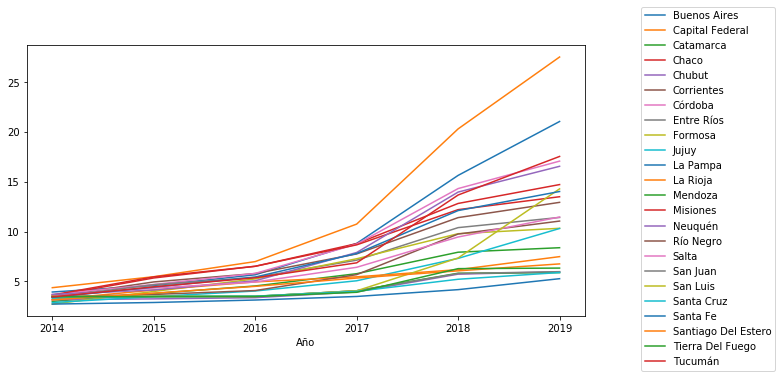

In [36]:
prom.unstack().plot(figsize=(10,5))
plt.legend(loc=[1.1,-0.2]) # Movemos la leyenda afuera de la figura para que no moleste

### En escala logaritmica

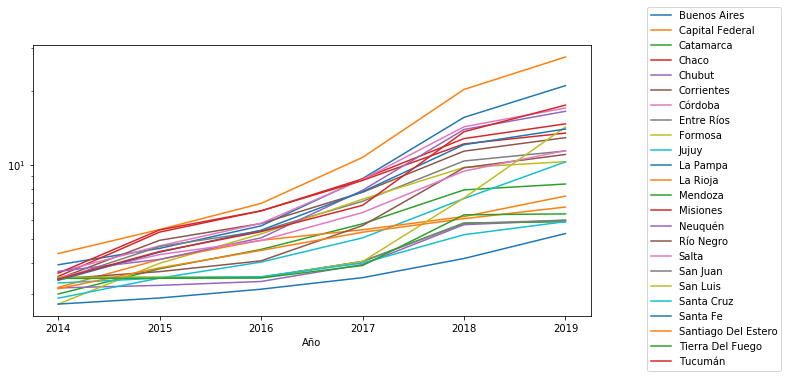

In [37]:
prom.unstack().plot(figsize=(10,5), logy=True)
plt.legend(loc=[1.1,-0.2]) # Movemos la leyenda afuera de la figura para que no moleste